In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image as displayImage
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn import metrics

from IPython.display import display
from PIL import Image
from sklearn.tree._tree import TREE_LEAF

import seaborn as sns
import pydotplus

%matplotlib inline


In [2]:
data = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
train, test = train_test_split(data, test_size=0.15)

In [5]:
train.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
y_train = train['Chance of Admit ']
y_train = y_train >= 0.725
new_Arr = []
trues = 0
falses = 0
for b in y_train:
    new_Arr.append(int(b))
    if b:
        trues = trues + 1   
    else:
        falses = falses + 1
        

print("Length before: {}", len(y_train))
y_train= pd.Series( (v for v in new_Arr) )

print("Trues: {} and Falses: {}".format(trues, falses))
print("Length: {}", len(y_train))




Length before: {} 425
Trues: 213 and Falses: 212
Length: {} 425


In [7]:
y_test = test['Chance of Admit ']
y_test = y_test >= 0.725
new_arr = []
trues1 = 0
false1 = 0
for b in y_test:
    new_arr.append(int(b))
    if b:
        trues1 = trues1 + 1
    else:
        false1 = false1 + 1
y_test = pd.Series( (v for v in new_arr) )

print("Trues: {} and Falses: {}".format(trues1, false1))
print("Length: ", len(y_test))

Trues: 35 and Falses: 40
Length:  75


In [8]:
features = ['GRE Score', 'University Rating', 'CGPA' ]
x_train = train[features]
x_test = test[features]

In [9]:
def concentrationMaker(classifier, name):
    testScore = classifier.score(x_test, y_test)
    trainingScore = classifier.score(x_train, y_train)
    trainingError = 1 - trainingScore
    testingError = 1 - testScore
    print("Analysis of {}: \n".format(name))
    print("Testing Score: {} and Training Score: {}".format(testScore, trainingScore))
    print("Training Error: {}".format(trainingError))
    print("Testing Error: {}".format(testingError))
    y_pred = classifier.predict(x_test)
    n = len(y_test)
    print("Confusion Matrix")
    mat = metrics.confusion_matrix(y_test, y_pred)
    print(mat)
    print("Total: ", n)
    print("Correct Positives ", mat[0][0])
    print("Correct Negatives ", mat[1][1])
    print("False Positives: ", mat[0][1])
    print("False Negatives: ", mat[1][0])

In [10]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [11]:
def makeLearningCurve(classifier, name):
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    plot_learning_curve(classifier, name, x_train, y_train, (0.01, 1.01), cv=cv, n_jobs=4)

In [12]:
print ("Training: {} and Test: {}".format(len(train), len(test)))

Training: 425 and Test: 75


# Decision Tree

In [61]:
c = DecisionTreeClassifier(min_samples_split=100)

In [62]:
t1 = time.time()
dt = c.fit(x_train, y_train)
t2 = time.time()
print("Training time of Decision Tree w/o pruning: ", (t2 - t1))


Training time of Decision Tree w/o pruning:  0.02425384521484375


Decison Tree


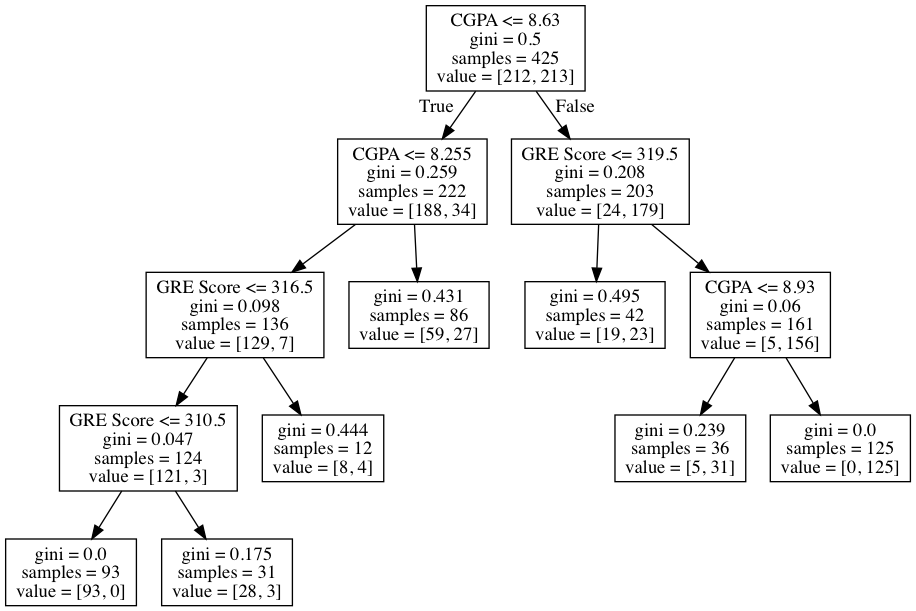

In [63]:
print ("Decison Tree")
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
displayImage(graph.create_png)
path = "DT.png"
graph.write_png("DT.png")

display(Image.open(path))

In [64]:
concentrationMaker(dt, "Decision Tree Without Pruning")

Analysis of Decision Tree Without Pruning: 

Testing Score: 0.8666666666666667 and Training Score: 0.8635294117647059
Training Error: 0.13647058823529412
Testing Error: 0.1333333333333333
Confusion Matrix
[[34  6]
 [ 4 31]]
Total:  75
Correct Positives  34
Correct Negatives  31
False Positives:  6
False Negatives:  4


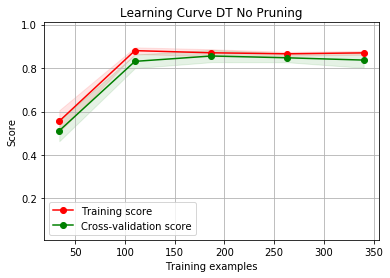

In [65]:
makeLearningCurve(dt, "Learning Curve DT No Pruning")

In [66]:
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

Pruned Decision Tree


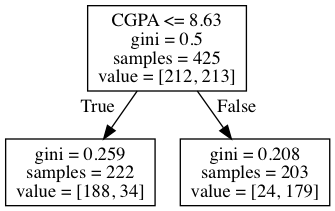

In [67]:
#pruning

prune_index(dt.tree_, 0, 40)
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
displayImage(graph.create_png)
path = "PrunedDT.png"
graph.write_png("PrunedDT.png")





print("Pruned Decision Tree")

display(Image.open(path))


In [68]:
concentrationMaker(dt, "Decision Tree With Pruning")

Analysis of Decision Tree With Pruning: 

Testing Score: 0.8666666666666667 and Training Score: 0.8635294117647059
Training Error: 0.13647058823529412
Testing Error: 0.1333333333333333
Confusion Matrix
[[34  6]
 [ 4 31]]
Total:  75
Correct Positives  34
Correct Negatives  31
False Positives:  6
False Negatives:  4


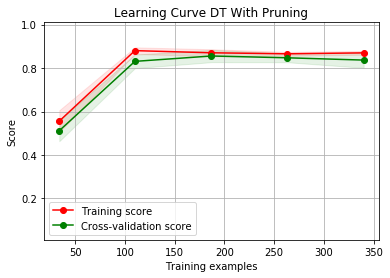

In [69]:
makeLearningCurve(dt, "Learning Curve DT With Pruning")

OverPruned Decision Tree


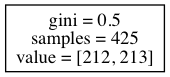

In [71]:
prune_index(dt.tree_, 0, 300)
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = features, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data)
displayImage(graph.create_png)
path = "OverPrunedDT.png"
graph.write_png("OverPrunedDT.png")





print("OverPruned Decision Tree")

display(Image.open(path))

In [72]:
concentrationMaker(dt, "Decision Tree With Too Much Pruning")

Analysis of Decision Tree With Too Much Pruning: 

Testing Score: 0.4666666666666667 and Training Score: 0.5011764705882353
Training Error: 0.49882352941176467
Testing Error: 0.5333333333333333
Confusion Matrix
[[ 0 40]
 [ 0 35]]
Total:  75
Correct Positives  0
Correct Negatives  35
False Positives:  40
False Negatives:  0


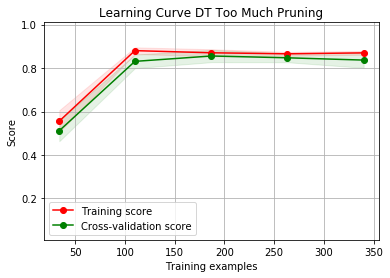

In [24]:
makeLearningCurve(dt, "Learning Curve DT Too Much Pruning")

# Implementing Neural Networks

/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Score:  0.7788235294117647
Optimal Layers:  6


Text(0.5, 1.0, 'Neural layers vs. Testing Scores')

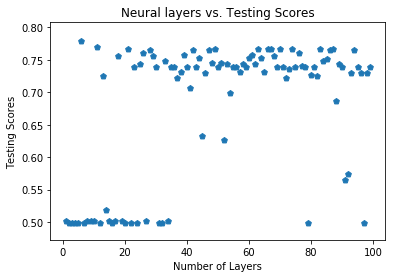

In [83]:
layers = []
runningTimes = []
trainingScores = []
bestTrainingScore = 0.0
indexOfBestScore = 0
training = []

for i in range(1, 100):
    mlp0 = MLPClassifier(hidden_layer_sizes=i, random_state=5, max_iter = 500)
    t1 = time.time()
    mlp0.fit(x_train,y_train)
    t2 = time.time()
    trainingScore = mlp0.score(x_train, y_train)
    if trainingScore > bestTrainingScore:
        bestTrainingScore = trainingScore
        indexOfBestScore = i
    layers.append(i)
    runningTimes.append((t2-t1))
    trainingScores.append(trainingScore)
    score = mlp0.score(x_train, y_train)
    training.append(score)
print("Best Score: ", bestTrainingScore)
print("Optimal Layers: ", indexOfBestScore)
plt.scatter(layers, trainingScores, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Testing Scores")
plt.title("Neural layers vs. Testing Scores")

Text(0.5, 1.0, 'Neural layers vs. Training Scores')

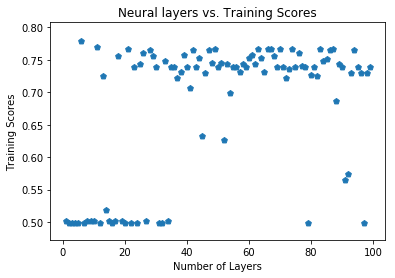

In [82]:
plt.scatter(layers, training, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Training Scores")
plt.title("Neural layers vs. Training Scores")

Text(0.5, 1.0, 'Neural layers vs. Training Times')

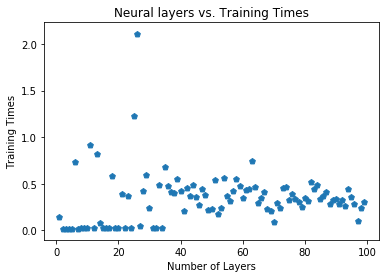

In [76]:
plt.scatter(layers, runningTimes, marker='p')
plt.xlabel("Number of Layers")
plt.ylabel("Training Times")
plt.title("Neural layers vs. Training Times")

In [77]:
mlp0 = MLPClassifier(hidden_layer_sizes=indexOfBestScore, random_state=5)
t1 = time.time()
mlp0.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(mlp0, "Neural Network With {} layers".format(indexOfBestScore))
print("Training Time of Neural Net With {} layers: {}".format(indexOfBestScore, (t2 -t1)))

Analysis of Neural Network With 6 layers: 

Testing Score: 0.6933333333333334 and Training Score: 0.72
Training Error: 0.28
Testing Error: 0.30666666666666664
Confusion Matrix
[[20 20]
 [ 3 32]]
Total:  75
Correct Positives  20
Correct Negatives  32
False Positives:  20
False Negatives:  3
Training Time of Neural Net With 6 layers: 0.30724191665649414


/Users/yuktmitash/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


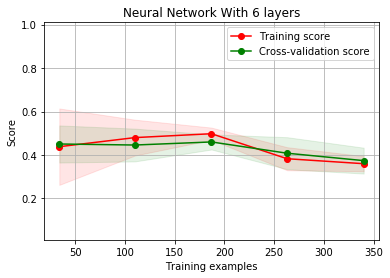

In [78]:
makeLearningCurve(mlp0, "Neural Network With {} layers".format(indexOfBestScore))

# Implementing Boosting

In [40]:
c = DecisionTreeClassifier(min_samples_split=100)
t1 = time.time()
c.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(c, "Decision Tree Without Boosting")

Analysis of Decision Tree Without Boosting: 

Testing Score: 0.8666666666666667 and Training Score: 0.8635294117647059
Training Error: 0.13647058823529412
Testing Error: 0.1333333333333333
Confusion Matrix
[[34  6]
 [ 4 31]]
Total:  75
Correct Positives  34
Correct Negatives  31
False Positives:  6
False Negatives:  4


In [41]:
print("Training time of unboosted Decision Tree: ", (t2 - t1))

Training time of unboosted Decision Tree:  0.003609895706176758


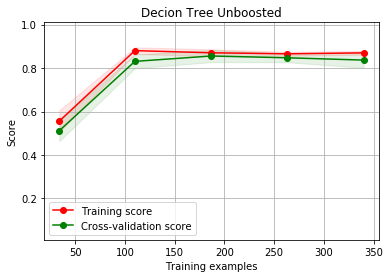

In [42]:
makeLearningCurve(c, "Decion Tree Unboosted")

In [43]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=20, learning_rate = 1)
t1 = time.time()
adb.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(adb, "Decision Tree Without Ada Algorithm Boosting")

Analysis of Decision Tree Without Ada Algorithm Boosting: 

Testing Score: 0.76 and Training Score: 1.0
Training Error: 0.0
Testing Error: 0.24
Confusion Matrix
[[30 10]
 [ 8 27]]
Total:  75
Correct Positives  30
Correct Negatives  27
False Positives:  10
False Negatives:  8


In [44]:
print("Training time of Decision Tree with ADA Algorithm Boosting: ", (t2 - t1))

Training time of Decision Tree with ADA Algorithm Boosting:  0.005786895751953125


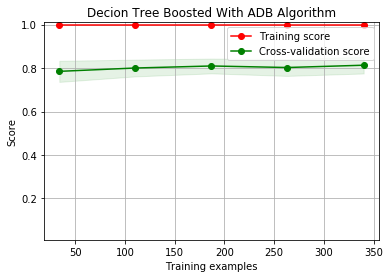

In [45]:
makeLearningCurve(adb, "Decion Tree Boosted With ADB Algorithm")

In [46]:
rf = RandomForestClassifier(n_estimators=20)
t1 = time.time()
rf.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(rf, "Decision Tree With RF Algorithm Boosting")

Analysis of Decision Tree With RF Algorithm Boosting: 

Testing Score: 0.84 and Training Score: 0.9929411764705882
Training Error: 0.007058823529411784
Testing Error: 0.16000000000000003
Confusion Matrix
[[34  6]
 [ 6 29]]
Total:  75
Correct Positives  34
Correct Negatives  29
False Positives:  6
False Negatives:  6


In [47]:
print("Training time of Decision Tree with RF Algorithm Boosting: ", (t2 - t1))

Training time of Decision Tree with RF Algorithm Boosting:  0.09227180480957031


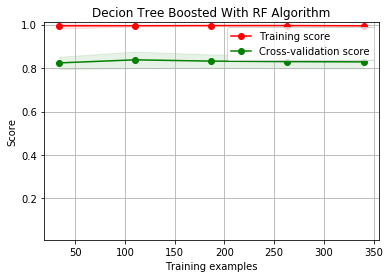

In [48]:
makeLearningCurve(rf, "Decion Tree Boosted With RF Algorithm")

# Support Vector Machines (Linear and RBF Kernels)

In [49]:
#Support Vector Machine with RBF kernel
mySVMRBF = svm.SVC(gamma = 0.001, C = 100, kernel="rbf")
t1 = time.time()
mySVMRBF.fit(x_train, y_train)
t2 = time.time()

concentrationMaker(mySVMRBF, "Support Vector Machine with RBF kernel")

Analysis of Support Vector Machine with RBF kernel: 

Testing Score: 0.8533333333333334 and Training Score: 0.8635294117647059
Training Error: 0.13647058823529412
Testing Error: 0.1466666666666666
Confusion Matrix
[[34  6]
 [ 5 30]]
Total:  75
Correct Positives  34
Correct Negatives  30
False Positives:  6
False Negatives:  5


In [50]:
print("Training time of SVM with RBF kernel: ", (t2 - t1))

Training time of SVM with RBF kernel:  0.011116981506347656


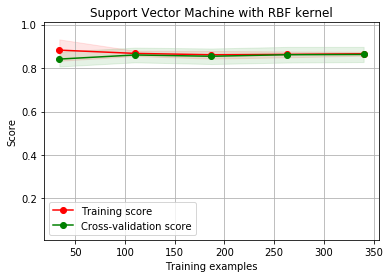

In [51]:
makeLearningCurve(mySVMRBF, "Support Vector Machine with RBF kernel")

In [52]:
#Supporting Vector Machine with Linear Kernel

mySVMSigmoid = svm.SVC(kernel="sigmoid", gamma="scale")

t1 = time.time()
mySVMSigmoid.fit(x_train, y_train)
t2 = time.time()
concentrationMaker(mySVMSigmoid, "Support Vector Machine with Sigmoid kernel")


Analysis of Support Vector Machine with Sigmoid kernel: 

Testing Score: 0.4666666666666667 and Training Score: 0.5011764705882353
Training Error: 0.49882352941176467
Testing Error: 0.5333333333333333
Confusion Matrix
[[ 0 40]
 [ 0 35]]
Total:  75
Correct Positives  0
Correct Negatives  35
False Positives:  40
False Negatives:  0


In [53]:
print("Training time of SVM with Sigmoid Kernel: ", (t2 - t1))

Training time of SVM with Sigmoid Kernel:  0.0069010257720947266


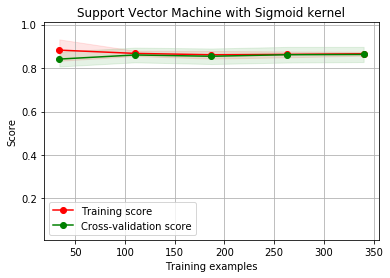

In [54]:
makeLearningCurve(mySVMRBF, "Support Vector Machine with Sigmoid kernel")

# k-nearest neighbors

In [55]:
trainingScores = []
testingScore = []
map = {}

for i in range(1,400):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=i)
    t1 = time.time()
    classifier.fit(x_train,y_train)
    t2 = time.time()
    trainingScores.append(classifier.score(x_train, y_train))
    testingScore.append(classifier.score(x_test, y_test))
    concentrationMaker(classifier, ("knn with {} neighbors".format(i)))
    print("Training Time of KNeighbors with {} neighbors: ".format(i),(t2-t1))
    map[i] = (t2 - t1)
    print("\n\n")

Analysis of knn with 1 neighbors: 

Testing Score: 0.7866666666666666 and Training Score: 1.0
Training Error: 0.0
Testing Error: 0.21333333333333337
Confusion Matrix
[[31  9]
 [ 7 28]]
Total:  75
Correct Positives  31
Correct Negatives  28
False Positives:  9
False Negatives:  7
Training Time of KNeighbors with 1 neighbors:  0.008239984512329102



Analysis of knn with 2 neighbors: 

Testing Score: 0.8133333333333334 and Training Score: 0.9176470588235294
Training Error: 0.08235294117647063
Testing Error: 0.18666666666666665
Confusion Matrix
[[35  5]
 [ 9 26]]
Total:  75
Correct Positives  35
Correct Negatives  26
False Positives:  5
False Negatives:  9
Training Time of KNeighbors with 2 neighbors:  0.0043561458587646484



Analysis of knn with 3 neighbors: 

Testing Score: 0.8133333333333334 and Training Score: 0.9152941176470588
Training Error: 0.08470588235294119
Testing Error: 0.18666666666666665
Confusion Matrix
[[33  7]
 [ 7 28]]
Total:  75
Correct Positives  33
Correct Negatives

Analysis of knn with 28 neighbors: 

Testing Score: 0.84 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.16000000000000003
Confusion Matrix
[[37  3]
 [ 9 26]]
Total:  75
Correct Positives  37
Correct Negatives  26
False Positives:  3
False Negatives:  9
Training Time of KNeighbors with 28 neighbors:  0.0015597343444824219



Analysis of knn with 29 neighbors: 

Testing Score: 0.84 and Training Score: 0.8611764705882353
Training Error: 0.13882352941176468
Testing Error: 0.16000000000000003
Confusion Matrix
[[37  3]
 [ 9 26]]
Total:  75
Correct Positives  37
Correct Negatives  26
False Positives:  3
False Negatives:  9
Training Time of KNeighbors with 29 neighbors:  0.003108978271484375



Analysis of knn with 30 neighbors: 

Testing Score: 0.84 and Training Score: 0.8588235294117647
Training Error: 0.14117647058823535
Testing Error: 0.16000000000000003
Confusion Matrix
[[37  3]
 [ 9 26]]
Total:  75
Correct Positives  37
Correct Negatives  26
Fa

Analysis of knn with 53 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 53 neighbors:  0.00350189208984375



Analysis of knn with 54 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 54 neighbors:  0.0015087127685546875



Analysis of knn with 55 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Po

[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 79 neighbors:  0.00202178955078125



Analysis of knn with 80 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 80 neighbors:  0.005246162414550781



Analysis of knn with 81 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8564705882352941
Training Error: 0.1435294117647059
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 81 neighbors:  0.0022058486938476562



Analysis of knn with 82 neighbors: 

Testing Score

Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 103 neighbors:  0.0022058486938476562



Analysis of knn with 104 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8541176470588235
Training Error: 0.14588235294117646
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 104 neighbors:  0.003141164779663086



Analysis of knn with 105 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.851764705882353
Training Error: 0.14823529411764702
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 105 neighbors:  0.001991748809814453



Analysis of knn with 106 n

Analysis of knn with 125 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8541176470588235
Training Error: 0.14588235294117646
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 125 neighbors:  0.0015082359313964844



Analysis of knn with 126 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.8541176470588235
Training Error: 0.14588235294117646
Testing Error: 0.1466666666666666
Confusion Matrix
[[37  3]
 [ 8 27]]
Total:  75
Correct Positives  37
Correct Negatives  27
False Positives:  3
False Negatives:  8
Training Time of KNeighbors with 126 neighbors:  0.0012021064758300781



Analysis of knn with 127 neighbors: 

Testing Score: 0.84 and Training Score: 0.8494117647058823
Training Error: 0.1505882352941177
Testing Error: 0.16000000000000003
Confusion Matrix
[[36  4]
 [ 8 27]]
Total:  75
Correct Positi

Analysis of knn with 149 neighbors: 

Testing Score: 0.84 and Training Score: 0.8470588235294118
Training Error: 0.15294117647058825
Testing Error: 0.16000000000000003
Confusion Matrix
[[36  4]
 [ 8 27]]
Total:  75
Correct Positives  36
Correct Negatives  27
False Positives:  4
False Negatives:  8
Training Time of KNeighbors with 149 neighbors:  0.0018949508666992188



Analysis of knn with 150 neighbors: 

Testing Score: 0.84 and Training Score: 0.8470588235294118
Training Error: 0.15294117647058825
Testing Error: 0.16000000000000003
Confusion Matrix
[[36  4]
 [ 8 27]]
Total:  75
Correct Positives  36
Correct Negatives  27
False Positives:  4
False Negatives:  8
Training Time of KNeighbors with 150 neighbors:  0.006412982940673828



Analysis of knn with 151 neighbors: 

Testing Score: 0.84 and Training Score: 0.8470588235294118
Training Error: 0.15294117647058825
Testing Error: 0.16000000000000003
Confusion Matrix
[[36  4]
 [ 8 27]]
Total:  75
Correct Positives  36
Correct Negatives 

Testing Error: 0.1466666666666666
Confusion Matrix
[[36  4]
 [ 7 28]]
Total:  75
Correct Positives  36
Correct Negatives  28
False Positives:  4
False Negatives:  7
Training Time of KNeighbors with 172 neighbors:  0.0029239654541015625



Analysis of knn with 173 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.84
Training Error: 0.16000000000000003
Testing Error: 0.1466666666666666
Confusion Matrix
[[36  4]
 [ 7 28]]
Total:  75
Correct Positives  36
Correct Negatives  28
False Positives:  4
False Negatives:  7
Training Time of KNeighbors with 173 neighbors:  0.0035247802734375



Analysis of knn with 174 neighbors: 

Testing Score: 0.8533333333333334 and Training Score: 0.84
Training Error: 0.16000000000000003
Testing Error: 0.1466666666666666
Confusion Matrix
[[36  4]
 [ 7 28]]
Total:  75
Correct Positives  36
Correct Negatives  28
False Positives:  4
False Negatives:  7
Training Time of KNeighbors with 174 neighbors:  0.0017762184143066406



Analysis of knn with

Analysis of knn with 195 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 195 neighbors:  0.0016951560974121094



Analysis of knn with 196 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 196 neighbors:  0.01641082763671875



Analysis of knn with 197 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Co

Analysis of knn with 217 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 217 neighbors:  0.0034859180450439453



Analysis of knn with 218 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 218 neighbors:  0.0009517669677734375



Analysis of knn with 219 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75


Analysis of knn with 239 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 239 neighbors:  0.0009150505065917969



Analysis of knn with 240 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 240 neighbors:  0.0009500980377197266



Analysis of knn with 241 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75


Analysis of knn with 264 neighbors: 

Testing Score: 0.88 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 264 neighbors:  0.0018000602722167969



Analysis of knn with 265 neighbors: 

Testing Score: 0.88 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 265 neighbors:  0.002885103225708008



Analysis of knn with 266 neighbors: 

Testing Score: 0.88 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
T

Analysis of knn with 288 neighbors: 

Testing Score: 0.88 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 288 neighbors:  0.0017349720001220703



Analysis of knn with 289 neighbors: 

Testing Score: 0.88 and Training Score: 0.8258823529411765
Training Error: 0.1741176470588235
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 289 neighbors:  0.0022430419921875



Analysis of knn with 290 neighbors: 

Testing Score: 0.88 and Training Score: 0.8329411764705882
Training Error: 0.16705882352941182
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Trai

Analysis of knn with 312 neighbors: 

Testing Score: 0.88 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 312 neighbors:  0.0011687278747558594



Analysis of knn with 313 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.1333333333333333
Confusion Matrix
[[35  5]
 [ 5 30]]
Total:  75
Correct Positives  35
Correct Negatives  30
False Positives:  5
False Negatives:  5
Training Time of KNeighbors with 313 neighbors:  0.0022258758544921875



Analysis of knn with 314 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8305882352941176
Training Error: 0.16941176470588237
Testing Error: 0.1333333333333333
Confusion Matrix
[[35  5]
 [ 5 30]]
Total:  75
Correct Positives  35
Correc

Analysis of knn with 336 neighbors: 

Testing Score: 0.88 and Training Score: 0.8329411764705882
Training Error: 0.16705882352941182
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5
Training Time of KNeighbors with 336 neighbors:  0.0020508766174316406



Analysis of knn with 337 neighbors: 

Testing Score: 0.8266666666666667 and Training Score: 0.8141176470588235
Training Error: 0.1858823529411765
Testing Error: 0.17333333333333334
Confusion Matrix
[[32  8]
 [ 5 30]]
Total:  75
Correct Positives  32
Correct Negatives  30
False Positives:  8
False Negatives:  5
Training Time of KNeighbors with 337 neighbors:  0.00427699089050293



Analysis of knn with 338 neighbors: 

Testing Score: 0.8266666666666667 and Training Score: 0.8141176470588235
Training Error: 0.1858823529411765
Testing Error: 0.17333333333333334
Confusion Matrix
[[32  8]
 [ 5 30]]
Total:  75
Correct Positives  32
Correct 

Analysis of knn with 359 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 359 neighbors:  0.002107858657836914



Analysis of knn with 360 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 360 neighbors:  0.0036559104919433594



Analysis of knn with 361 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
C

Analysis of knn with 381 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.8352941176470589
Training Error: 0.16470588235294115
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 381 neighbors:  0.006699800491333008



Analysis of knn with 382 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.84
Training Error: 0.16000000000000003
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct Negatives  29
False Positives:  4
False Negatives:  6
Training Time of KNeighbors with 382 neighbors:  0.0009710788726806641



Analysis of knn with 383 neighbors: 

Testing Score: 0.8666666666666667 and Training Score: 0.84
Training Error: 0.16000000000000003
Testing Error: 0.1333333333333333
Confusion Matrix
[[36  4]
 [ 6 29]]
Total:  75
Correct Positives  36
Correct

Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Testing Score')

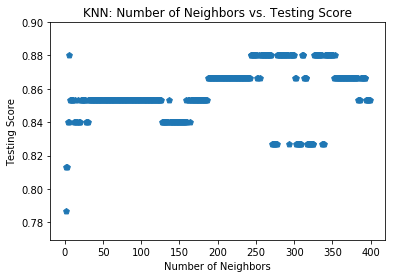

In [56]:
x = range(1,400)
y = testingScore

plt.scatter(x, y, marker='p')
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Score")
plt.title("KNN: Number of Neighbors vs. Testing Score")

Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Training Score')

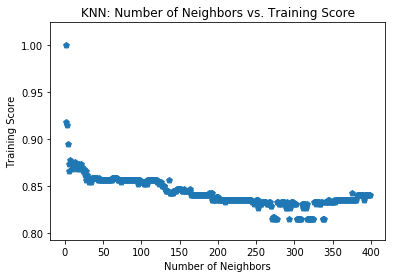

In [57]:
x = range(1,400)
y = trainingScores

plt.scatter(x, y, marker='p')
plt.xlabel("Number of Neighbors")
plt.ylabel("Training Score")
plt.title("KNN: Number of Neighbors vs. Training Score")

In [58]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
concentrationMaker(classifier, "knn with 5 neighbors, (highest accuracy)")


Analysis of knn with 5 neighbors, (highest accuracy): 

Testing Score: 0.88 and Training Score: 0.8729411764705882
Training Error: 0.12705882352941178
Testing Error: 0.12
Confusion Matrix
[[36  4]
 [ 5 30]]
Total:  75
Correct Positives  36
Correct Negatives  30
False Positives:  4
False Negatives:  5


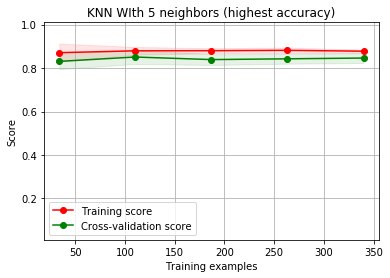

In [59]:
makeLearningCurve(classifier, "KNN WIth 5 neighbors (highest accuracy)")

Text(0.5, 1.0, 'KNN: Number of Neighbors vs. Training Time')

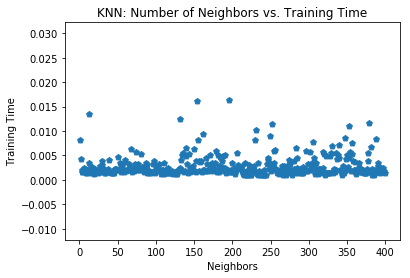

In [60]:
x = map.keys()
y = []
for key in x:
    y.append(map[key])
plt.scatter(x, y, marker='p')
plt.xlabel("Neighbors")
plt.ylabel("Training Time")
plt.title("KNN: Number of Neighbors vs. Training Time")